In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
fc = pd.read_csv('derivatives/mean_fc_matrix/sub-NDARINVAG023WG3task-rest_desc-FCmatrix.csv', index_col=0)
fc

,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_2,17Networks_LH_VisCent_ExStr_3,17Networks_LH_VisCent_ExStr_4,17Networks_LH_VisCent_ExStr_5,17Networks_LH_VisCent_ExStr_6,17Networks_LH_VisCent_Striate_1,17Networks_LH_VisCent_ExStr_7,17Networks_LH_VisCent_ExStr_8,17Networks_LH_VisCent_ExStr_9,...,17Networks_RH_TempPar_1,17Networks_RH_TempPar_2,17Networks_RH_TempPar_3,17Networks_RH_TempPar_4,17Networks_RH_TempPar_5,17Networks_RH_TempPar_6,17Networks_RH_TempPar_7,17Networks_RH_TempPar_8,17Networks_RH_TempPar_9,17Networks_RH_TempPar_10
17Networks_LH_VisCent_ExStr_1,1.000000,0.366652,0.468668,0.398579,0.545407,0.101791,0.071231,0.074785,0.024760,0.015620,...,0.128755,-0.129521,-0.070859,-0.031200,0.038317,-0.047000,0.014583,-0.075839,0.033382,-0.099688
17Networks_LH_VisCent_ExStr_2,0.366652,1.000000,0.477221,0.605504,0.510404,0.262403,0.273936,0.256748,0.234753,0.247939,...,0.473891,0.076595,0.125361,0.251128,0.260000,0.254551,0.428159,0.223222,0.346147,0.101984
17Networks_LH_VisCent_ExStr_3,0.468668,0.477221,1.000000,0.388838,0.686170,0.133837,0.243382,0.265600,0.154972,0.255610,...,0.363895,0.085526,0.134449,0.276021,0.271568,0.273428,0.345296,0.246293,0.346124,0.073174
17Networks_LH_VisCent_ExStr_4,0.398579,0.605504,0.388838,1.000000,0.497925,0.501791,0.257455,0.201337,0.139288,0.266614,...,0.351902,-0.027101,0.099422,0.199777,0.215669,0.187680,0.310491,0.099340,0.301444,-0.003647
17Networks_LH_VisCent_ExStr_5,0.545407,0.510404,0.686170,0.497925,1.000000,0.079175,0.182750,0.213591,0.095501,0.177213,...,0.368893,0.057610,0.097418,0.280327,0.299437,0.235284,0.325817,0.177014,0.330699,0.040249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17Networks_RH_TempPar_6,-0.047000,0.254551,0.273428,0.187680,0.235284,0.120369,0.287841,0.261506,0.314306,0.336938,...,0.523848,0.485152,0.328908,0.727830,0.762992,1.000000,0.663314,0.706058,0.730583,0.680036
17Networks_RH_TempPar_7,0.014583,0.428159,0.345296,0.310491,0.325817,0.143435,0.267434,0.301400,0.264425,0.270693,...,0.729219,0.558412,0.516141,0.841181,0.667924,0.663314,1.000000,0.645678,0.863685,0.374279
17Networks_RH_TempPar_8,-0.075839,0.223222,0.246293,0.099340,0.177014,0.086665,0.302327,0.236972,0.403338,0.284117,...,0.529880,0.713783,0.578317,0.624093,0.472477,0.706058,0.645678,1.000000,0.603578,0.672367
17Networks_RH_TempPar_9,0.033382,0.346147,0.346124,0.301444,0.330699,0.148466,0.282656,0.312482,0.240236,0.278664,...,0.753694,0.454495,0.432242,0.861574,0.772820,0.730583,0.863685,0.603578,1.000000,0.329879


First, we have to transform the matrix data to a long-format DataFrame. The FC matrix is symmetrical and the diagonal contains
no relevant information (because there are no loops), so we only keep the upper triangle data of the matrix. It would be the same if we choose the lower triangle instead.

In [38]:
triu_idx = np.triu_indices_from(fc, k=1)

In [54]:
# Extract region labels
region1_labels = fc.index[triu_idx[0]]
region2_labels = fc.columns[triu_idx[1]]
fc_values = fc.values[triu_idx]

# Create a long-form DataFrame
fc_long = pd.DataFrame({
    'region1': region1_labels,
    'region2': region2_labels,
    'fc': fc_values
})

# Show result
fc_long.head()

,region1,region2,fc
0,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_2,0.366652
1,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_3,0.468668
2,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_4,0.398579
3,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_5,0.545407
4,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_6,0.101791


In [40]:
region1 = (fc_long
 ['region1']
 .str.extract(r'17Networks_([R,L]H)_([a-z,A-Z,0-9]+)_(\w+)')
 .replace('', pd.NA)
 .rename({0:'region1_hemisphere', 1:'region1_network', 2:'region1_label'}, axis=1)
 )

region2 = (fc_long
 ['region2']
 .str.extract(r'17Networks_([R,L]H)_([a-z,A-Z,0-9]+)_(\w+)')
 .replace('', pd.NA)
 .rename({0:'region2_hemisphere', 1:'region2_network', 2:'region2_label'}, axis=1)
 )

In [41]:
fc_long

,region1,region2,fc
0,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_2,0.366652
1,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_3,0.468668
2,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_4,0.398579
3,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_5,0.545407
4,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_6,0.101791
...,...,...,...
79795,17Networks_RH_TempPar_7,17Networks_RH_TempPar_9,0.863685
79796,17Networks_RH_TempPar_7,17Networks_RH_TempPar_10,0.374279
79797,17Networks_RH_TempPar_8,17Networks_RH_TempPar_9,0.603578
79798,17Networks_RH_TempPar_8,17Networks_RH_TempPar_10,0.672367


In [42]:
fc_long = fc_long.merge(region1, left_index=True, right_index=True).merge(region2, left_index=True, right_index=True)

In [43]:
fc_long

,region1,region2,fc,region1_hemisphere,region1_network,region1_label,region2_hemisphere,region2_network,region2_label
0,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_2,0.366652,LH,VisCent,ExStr_1,LH,VisCent,ExStr_2
1,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_3,0.468668,LH,VisCent,ExStr_1,LH,VisCent,ExStr_3
2,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_4,0.398579,LH,VisCent,ExStr_1,LH,VisCent,ExStr_4
3,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_5,0.545407,LH,VisCent,ExStr_1,LH,VisCent,ExStr_5
4,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_6,0.101791,LH,VisCent,ExStr_1,LH,VisCent,ExStr_6
...,...,...,...,...,...,...,...,...,...
79795,17Networks_RH_TempPar_7,17Networks_RH_TempPar_9,0.863685,RH,TempPar,7,RH,TempPar,9
79796,17Networks_RH_TempPar_7,17Networks_RH_TempPar_10,0.374279,RH,TempPar,7,RH,TempPar,10
79797,17Networks_RH_TempPar_8,17Networks_RH_TempPar_9,0.603578,RH,TempPar,8,RH,TempPar,9
79798,17Networks_RH_TempPar_8,17Networks_RH_TempPar_10,0.672367,RH,TempPar,8,RH,TempPar,10


In [44]:
networks = fc_long['region1_network'].dropna().unique().tolist()

In [45]:
len(networks)

17

In [46]:
network_permutations = {}
for network1 in networks:
    for network2 in networks:
        networks_sorted = pd.Series([network1, network2]).sort_values().to_list()
        network_name = f'{networks_sorted[0]}-{networks_sorted[1]}'
        network_permutation = f'{network1}-{network2}'
        network_permutations[network_permutation] = network_name

In [47]:
len(network_permutations)

289

We should have ((17^2-17)/2)+17 = 153 edges

In [48]:
len(set(network_permutations.values()))

153

In [49]:
fc_long.loc[:,'network_permutation'] = fc_long['region1_network'] + '-' + fc_long['region2_network']

fc_long['network_connection'] = fc_long['network_permutation'].replace(network_permutations)

fc_long.loc[:, 'within_network'] = fc_long['region1_network'] == fc_long['region2_network']

In [50]:
fc_long

,region1,region2,fc,region1_hemisphere,region1_network,region1_label,region2_hemisphere,region2_network,region2_label,network_permutation,network_connection,within_network
0,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_2,0.366652,LH,VisCent,ExStr_1,LH,VisCent,ExStr_2,VisCent-VisCent,VisCent-VisCent,True
1,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_3,0.468668,LH,VisCent,ExStr_1,LH,VisCent,ExStr_3,VisCent-VisCent,VisCent-VisCent,True
2,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_4,0.398579,LH,VisCent,ExStr_1,LH,VisCent,ExStr_4,VisCent-VisCent,VisCent-VisCent,True
3,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_5,0.545407,LH,VisCent,ExStr_1,LH,VisCent,ExStr_5,VisCent-VisCent,VisCent-VisCent,True
4,17Networks_LH_VisCent_ExStr_1,17Networks_LH_VisCent_ExStr_6,0.101791,LH,VisCent,ExStr_1,LH,VisCent,ExStr_6,VisCent-VisCent,VisCent-VisCent,True
...,...,...,...,...,...,...,...,...,...,...,...,...
79795,17Networks_RH_TempPar_7,17Networks_RH_TempPar_9,0.863685,RH,TempPar,7,RH,TempPar,9,TempPar-TempPar,TempPar-TempPar,True
79796,17Networks_RH_TempPar_7,17Networks_RH_TempPar_10,0.374279,RH,TempPar,7,RH,TempPar,10,TempPar-TempPar,TempPar-TempPar,True
79797,17Networks_RH_TempPar_8,17Networks_RH_TempPar_9,0.603578,RH,TempPar,8,RH,TempPar,9,TempPar-TempPar,TempPar-TempPar,True
79798,17Networks_RH_TempPar_8,17Networks_RH_TempPar_10,0.672367,RH,TempPar,8,RH,TempPar,10,TempPar-TempPar,TempPar-TempPar,True


In [51]:
network_avg_fc = fc_long.groupby('network_connection')['fc'].mean().to_frame().reset_index().merge(fc_long[['network_connection', 'within_network']].drop_duplicates())

In [52]:
network_avg_fc

,network_connection,fc,within_network
0,ContA-ContA,0.273732,True
1,ContA-ContB,0.172078,False
2,ContA-ContC,0.106878,False
3,ContA-DefaultA,0.129903,False
4,ContA-DefaultB,0.131996,False
...,...,...,...
148,TempPar-VisCent,0.107027,False
149,TempPar-VisPeri,-0.045304,False
150,VisCent-VisCent,0.175083,True
151,VisCent-VisPeri,0.110840,False


Sanity check: Within-network FC should be higher than between-network FC. 

<Axes: xlabel='within_network', ylabel='fc'>

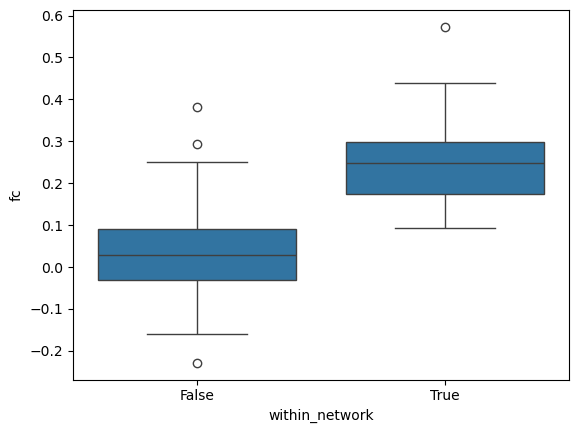

In [53]:
sns.boxplot(network_avg_fc, x='within_network', y='fc')